# Test darts
notebook to test that importing works well, and make sure we have the timeseries have the right frequency/format etc..

In [1]:
%reload_ext autoreload
%autoreload 2


In [9]:
# check if working in colab
try:
    # In colab
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content/drive/MyDrive/projects/paris-traffic-forecast
    %pip install -q darts

except:
    # In local
    # replace with your path
    %cd /mnt/d/Google Drive/projects/paris-traffic-forecast



/mnt/d/Google Drive/projects/paris-traffic-forecast


## load data

In [29]:
import pandas as pd
path_to_data = 'data/AV-champs-elysees.csv'
time_col = "Date et heure de comptage"
value_cols = ['Débit horaire', "Taux d'occupation"]
df = pd.read_csv(path_to_data, sep=';').sort_values(time_col)[:5]
df = df[[time_col] +value_cols]
df

,Date et heure de comptage,Débit horaire,Taux d'occupation
4065,2020-11-01T04:00:00+01:00,34.0,0.40111
4070,2020-11-01T05:00:00+01:00,40.0,0.48389
2967,2020-11-01T06:00:00+01:00,66.0,0.75056
3347,2020-11-01T07:00:00+01:00,108.0,0.99611
4063,2020-11-01T08:00:00+01:00,126.0,1.09889


In [30]:
# set datetime index
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'], utc=True).dt.tz_localize(None)
df[time_col] = pd.DatetimeIndex(df[time_col])
df = df.set_index(time_col)
df

,Débit horaire,Taux d'occupation
Date et heure de comptage,,
2020-11-01 03:00:00,34.0,0.40111
2020-11-01 04:00:00,40.0,0.48389
2020-11-01 05:00:00,66.0,0.75056
2020-11-01 06:00:00,108.0,0.99611
2020-11-01 07:00:00,126.0,1.09889


In [31]:
df.dtypes

Débit horaire        float64
Taux d'occupation    float64
dtype: object

In [32]:
df.index

DatetimeIndex(['2020-11-01 03:00:00', '2020-11-01 04:00:00',
               '2020-11-01 05:00:00', '2020-11-01 06:00:00',
               '2020-11-01 07:00:00'],
              dtype='datetime64[ns]', name='Date et heure de comptage', freq=None)

In [33]:
from darts import TimeSeries
ts = TimeSeries.from_dataframe(df, 
                          value_cols=["Débit horaire", "Taux d'occupation"],
                          fill_missing_dates=True,
                          freq='H')
ts

<TimeSeries (DataArray) (Date et heure de comptage: 5, component: 2, sample: 1)>
array([[[ 34.     ],
        [  0.40111]],

       [[ 40.     ],
        [  0.48389]],

       [[ 66.     ],
        [  0.75056]],

       [[108.     ],
        [  0.99611]],

       [[126.     ],
        [  1.09889]]])
Coordinates:
  * Date et heure de comptage  (Date et heure de comptage) datetime64[ns] 202...
  * component                  (component) object 'Débit horaire' "Taux d'occ...
Dimensions without coordinates: sample

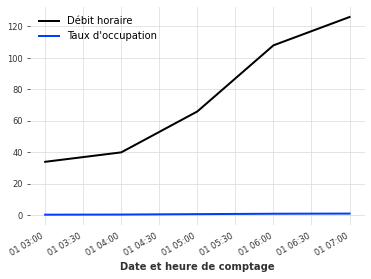

In [34]:
ts.plot()